In [0]:
'''
Assignment 3:

linear regression

- Reproduce the results from Chapter 3 from ISLR on Adverstising data
  to answer which channels can be attributed to sales.
'''

# Downloading the training data
import os

! wget https://raw.githubusercontent.com/rohit9650/ML/master/AML/Advertising.csv
print(os.listdir("/content/"))

--2019-01-27 18:50:06--  https://raw.githubusercontent.com/rohit9650/ML/master/AML/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5166 (5.0K) [text/plain]
Saving to: ‘Advertising.csv.8’

Advertising.csv.8   100%[===================>]   5.04K  --.-KB/s    in 0s      

2019-01-27 18:50:06 (73.9 MB/s) - ‘Advertising.csv.8’ saved [5166/5166]

['.config', 'Advertising.csv.7', 'Advertising.csv.1', 'Advertising.csv.3', 'Advertising.csv.4', 'Advertising.csv.6', 'Advertising.csv.8', 'Advertising.csv.5', 'Advertising.csv', 'Advertising.csv.2', 'sample_data']


In [0]:
import numpy as np 
import pandas as pd 

# Reading the dataset with dropping unnecessay column
data = pd.read_csv("/content/Advertising.csv.8", index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [0]:
# features and target

x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

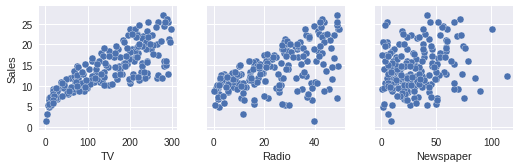

In [0]:
# plotting the relationship graph

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data=data, 
             x_vars=['TV', 'Radio', 'Newspaper'], 
             y_vars='Sales')


In [0]:
#check the missing columns

data.isnull().values.any()

False

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3)


In [0]:
r2score_dict = {'Sales ~ TV':0, 
                'Sales ~ Radio':0,
                'Sales ~ Newspaper':0,
                'Sales ~ TV + Radio':0,
                'Sales ~ TV + Newspaper':0,
                'Sales ~ Radio + Newspaper':0,
                'Sales ~ TV + Radio + Newspaper':0}
rmse_dict = {'Sales ~ TV':0, 
                'Sales ~ Radio':0,
                'Sales ~ Newspaper':0,
                'Sales ~ TV + Radio':0,
                'Sales ~ TV + Newspaper':0,
                'Sales ~ Radio + Newspaper':0,
                'Sales ~ TV + Radio + Newspaper':0}

In [0]:
new_data = pd.DataFrame(x_train)
new_data['Sales'] = pd.DataFrame(y_train)
print(new_data.head())

        TV  Radio  Newspaper  Sales
16   195.4   47.7       52.9   22.4
150   44.7   25.8       20.6   10.1
57     7.3   28.1       41.4    5.5
194  166.8   42.0        3.6   19.6
108   90.4    0.3       23.2    8.7


In [0]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='Sales ~ TV', 
                  data=new_data).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    6.994418
TV           0.047649
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     215.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.95e-30
Time:                        21:08:06   Log-Likelihood:                -364.88
No. Observations:                 140   AIC:                             733.8
Df Residuals:                     138   BIC:                             739.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [0]:
y_pred = lm_model.predict(x_test)

r2score = r2_score(y_test, y_pred)
print(r2score)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

r2score_dict['Sales ~ TV'] = r2score
rmse_dict['Sales ~ TV'] = rmse

0.6179204885026602
3.156819316558862


In [0]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='Sales ~ Radio', 
                  data=new_data).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    9.201038
Radio        0.205986
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     68.53
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.61e-14
Time:                        21:08:06   Log-Likelihood:                -402.44
No. Observations:                 140   AIC:                             808.9
Df Residuals:                     138   BIC:                             814.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [0]:
y_pred = lm_model.predict(x_test)

r2score = r2_score(y_test, y_pred)
print(r2score)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

r2score_dict['Sales ~ Radio'] = r2score
rmse_dict['Sales ~ Radio'] = rmse

0.33171453287453523
4.174974803973364


In [0]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='Sales ~ Newspaper', 
                  data=new_data).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    12.160369
Newspaper     0.061372
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     8.566
Date:                Sun, 27 Jan 2019   Prob (F-statistic):            0.00401
Time:                        21:08:06   Log-Likelihood:                -426.45
No. Observations:                 140   AIC:                             856.9
Df Residuals:                     138   BIC:                             862.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [0]:
y_pred = lm_model.predict(x_test)

r2score = r2_score(y_test, y_pred)
print(r2score)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

r2score_dict['Sales ~ Newspaper'] = r2score
rmse_dict['Sales ~ Newspaper'] = rmse

0.03328776792238508
5.021361141112134


In [0]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='Sales ~ TV + Radio', 
                  data=new_data).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    2.824559
TV           0.045850
Radio        0.191182
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     579.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.45e-67
Time:                        21:08:06   Log-Likelihood:                -273.39
No. Observations:                 140   AIC:                             552.8
Df Residuals:                     137   BIC:                             561.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [0]:
y_pred = lm_model.predict(x_test)

r2score = r2_score(y_test, y_pred)
print(r2score)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

r2score_dict['Sales ~ TV + Radio'] = r2score
rmse_dict['Sales ~ TV + Radio'] = rmse

0.9040425093988959
1.5820211727125646


In [0]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='Sales ~ TV + Newspaper', 
                  data=new_data).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    5.647804
TV           0.046908
Newspaper    0.049139
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.14e-31
Time:                        21:08:06   Log-Likelihood:                -357.85
No. Observations:                 140   AIC:                             721.7
Df Residuals:                     137   BIC:                             730.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [0]:
y_pred = lm_model.predict(x_test)

r2score = r2_score(y_test, y_pred)
print(r2score)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

r2score_dict['Sales ~ TV + Newspaper'] = r2score
rmse_dict['Sales ~ TV + Newspaper'] = rmse

0.6421740770665469
3.054982666707557


In [0]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='Sales ~ Radio + Newspaper', 
                  data=new_data).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    8.949669
Radio        0.199551
Newspaper    0.013527
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.82e-13
Time:                        21:08:06   Log-Likelihood:                -402.18
No. Observations:                 140   AIC:                             810.4
Df Residuals:                     137   BIC:                             819.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [0]:
y_pred = lm_model.predict(x_test)

r2score = r2_score(y_test, y_pred)
print(r2score)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

r2score_dict['Sales ~ Radio + Newspaper'] = r2score
rmse_dict['Sales ~ Radio + Newspaper'] = rmse

0.32530114588388337
4.194960122105913


In [0]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='Sales ~ TV + Radio + Newspaper', 
                  data=new_data).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    2.755362
TV           0.045807
Radio        0.189271
Newspaper    0.004046
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     384.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.41e-66
Time:                        21:08:06   Log-Likelihood:                -273.24
No. Observations:                 140   AIC:                             554.5
Df Residuals:                     136   BIC:                             566.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [0]:
print(x_test.head())
print(new_data.head())

        TV  Radio  Newspaper
165  117.2   14.7        5.4
89    88.3   25.5       73.4
62   261.3   42.7       54.7
116   75.1   35.0       52.7
147  240.1    7.3        8.7
        TV  Radio  Newspaper  Sales
16   195.4   47.7       52.9   22.4
150   44.7   25.8       20.6   10.1
57     7.3   28.1       41.4    5.5
194  166.8   42.0        3.6   19.6
108   90.4    0.3       23.2    8.7


In [0]:
y_pred = lm_model.predict(x_test)

r2score = r2_score(y_test, y_pred)
print(r2score)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

r2score_dict['Sales ~ TV + Radio + Newspaper'] = r2score
rmse_dict['Sales ~ TV + Radio + Newspaper'] = rmse

0.9021598465364911
1.5974652257775326


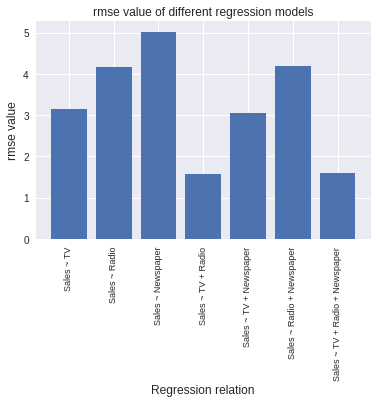

In [0]:
def plot_rmse():
    # this is for plotting purpose
    index = np.arange(len(list(rmse_dict.values())))
    plt.bar(index, list(rmse_dict.values()))
    plt.xlabel('Regression relation', fontsize=12)
    plt.ylabel('rmse value', fontsize=12)
    plt.xticks(index, list(rmse_dict.keys()), fontsize=9, rotation=90)
    plt.title('rmse value of different regression models')
    plt.show()

plot_rmse()


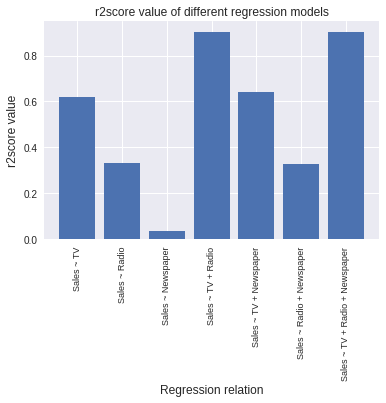

In [0]:
def plot_r2score():
    # this is for plotting purpose
    index = np.arange(len(list(r2score_dict.values())))
    plt.bar(index, list(r2score_dict.values()))
    plt.xlabel('Regression relation', fontsize=12)
    plt.ylabel('r2score value', fontsize=12)
    plt.xticks(index, list(r2score_dict.keys()), fontsize=9, rotation=90)
    plt.title('r2score value of different regression models')
    plt.show()

plot_r2score()

In [0]:
# so We select the features T.V and Radio